## ML Classification


Once we have found the topics of interest, we can characterize them by the most frequent words. Using a multi class machine larning classification model, we can verify if those "most frequent words" are enough to explain why a document belong to an specific topic. 

Therefore, this script is based on the application of this multi class classifier and its evaluation. 


### 1. Packages

In [26]:
##Packages 
import pandas as pd 
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import neighbors
from sklearn import tree
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import string 


### 2. Import data 

In [7]:
##Carregam taula amb 
data = pd.read_csv('data_angles_classificat_27022016.csv', encoding='utf-8')
column_names = ('index','index1','area','cerca','data_document','identificador',
                'organisme_emisor','text','tipus_doc','titol','url','id','classificacio')
data.columns = column_names

In [16]:
##Carreguem els docs amb les paraules filtrades
data_filtered = pd.read_csv('DOGC_english_text_filtered.csv')
data_filtered.shape

(204, 4285)

In [17]:
## Load topics and most frequent words per topic 
topics = pd.read_csv('topics_27022016.csv')
topics.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9
0,0,public,provision,article,procedure,administrative,agreement,document,accordance,service,appeal
1,1,staff,function,job,management,service,approved,care,provision,member,accordance
2,2,prize,school,research,work,audiovisual,award,jury,euro,communication,grant
3,3,test,selection,court,public,board,applicant,call,exercise,process,place
4,4,data,file,professional,exercise,information,right,service,address,access,number


In [39]:
paraula_text0 = data_filtered.iloc[0].str.strip()

In [60]:
paraules_topic = list()
for topic in topics.values: 
    for paraula in topic: 
        paraules_topic.append(paraula)
        
len(paraules_topic)
##Remove numbers 
for number in range(4): 
    paraules_topic.remove(number)

print 'Paraules topics sense nombres: ',  paraules_topic

In [134]:
contador = 0
vector_paraula_text_topic = [0]*len(paraules_topic)
vector_paraula_topic_dins_text = [0]*len(paraula_text0)
for paraula_text in paraula_text0: 
    for paraula_topic in paraules_topic: 
        if paraula_text==paraula_topic: 
            vector_paraula_topic_dins_text[contador]=1
            break
        else: 
            vector_paraula_topic_dins_text[contador]=0
    contador=contador+1 


In [136]:
len(vector_paraula_topic_dins_text)

4285

In [137]:
contador = 0
vector_paraula_text_topic = [0]*len(paraules_topic)
for paraula_topic in paraules_topic: 
    for paraula_text in paraula_text0: 
        if paraula_topic==paraula_text:
            vector_paraula_text_topic[contador]=1 
            break 
        else: 
            vector_paraula_text_topic[contador]=0
    contador=contador+1


In [139]:
len(vector_paraula_text_topic)

51

In [140]:
len(paraules_topic)

51

In [160]:
matriu_paraules_topic_text = list() 
for index_text in range(data_filtered.shape[0]): 
    paraula_text0 = data_filtered.iloc[index_text].str.strip()
    contador = 0
    vector_paraula_text_topic = [0]*len(paraules_topic)
    for paraula_topic in paraules_topic: 
        for paraula_text in paraula_text0: 
            if paraula_topic==paraula_text:
                vector_paraula_text_topic[contador]=1 
                break 
            else: 
                vector_paraula_text_topic[contador]=0
        contador=contador+1

    matriu_paraules_topic_text.append(vector_paraula_text_topic)
    

In [161]:
matriu_paraules_binari = pd.DataFrame(matriu_paraules_topic_text, columns=paraules_topic)

In [162]:
matriu_paraules_binari.head()

,public,provision,article,procedure,administrative,agreement,document,accordance,service,appeal,...,data,file,professional,exercise,information,right,service,address,access,number
0,0,1,0,0,0,1,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,1,1,1,1,1,1,1,1,1,0,...,1,0,0,1,0,1,1,0,1,0
2,1,1,1,1,1,1,1,1,0,0,...,1,0,1,1,1,1,0,0,1,1
3,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
4,1,1,0,1,0,1,0,0,1,0,...,1,1,1,1,1,1,1,1,1,1


In [163]:
matriu_paraules_binari.shape

(204, 51)

## Multiclass classification

The strategy that is going to be followed for multiclass is the "OneVsRestClassifier". This strategy involves training one single classifier per each class (the positive class) while the rest of the class are labeled as the negative class. The result of each model is a real-valued confidence score, that then can be weighted to determine which final label apply to each sample. 

We are going to test two different models: 

- Linear Support Vector Classification (LinearSVC): support vector machine classifier using a lineal kernel. 
- Logistic regression


In [178]:
X = matriu_paraules_binari
y = data.classificacio
print 'Matriu: ', X.shape 
print 'Vector resposta', len(y)

Matriu:  (204, 51)
Vector resposta 204


In [233]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.linear_model import LogisticRegression

In [240]:
acc_onevsrest = [0] * 10 
acc_logreg = [0] * 10 

for i in xrange(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5)
    ##Create the classifier 
    onevsrest = OneVsRestClassifier(LinearSVC(random_state=0))
    logregression = LogisticRegression()
    ##Fit on train 
    onevsrest.fit(X_train,y_train) 
    logregression.fit(X_train,y_train) 

    ##Predict on test   
    yhat_onevsrest = onevsrest.predict(X_test) 
    yhat_logreg = logregression.predict(X_test)

    acc_onevsrest[i] = metrics.accuracy_score(yhat_onevsrest, y_test)
    acc_logreg[i] = metrics.accuracy_score(yhat_logreg, y_test)

print np.asarray(acc_onevsrest).mean()
print np.asarray(acc_logreg).mean()

0.926829268293
0.90243902439


Comparing both accuracies values for the test set, we can chec that the ones obtained with the LinearSVC is slightly better. Therefore we are going to use this one for the resultsM

classification accuracy: 0.926829268293
Classification Report:
             precision    recall  f1-score   support

          0       0.90      0.82      0.86        11
          1       0.87      0.93      0.90        14
          2       1.00      1.00      1.00        11
          3       1.00      1.00      1.00         2
          4       1.00      1.00      1.00         3

avg / total       0.93      0.93      0.93        41



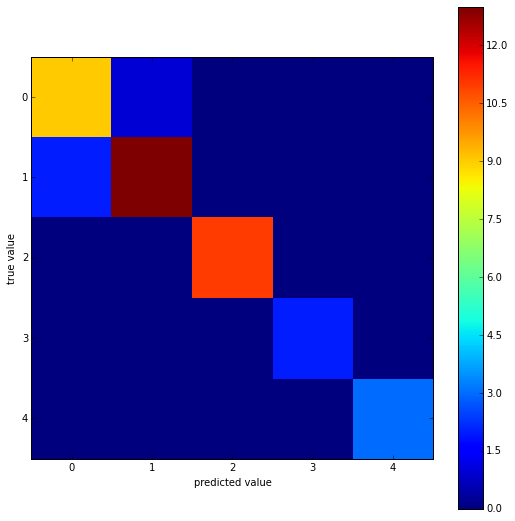

In [241]:
%matplotlib inline
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9,9)    
    
print "classification accuracy:", metrics.accuracy_score(yhat_onevsrest, y_test)
plot_confusion_matrix(yhat_onevsrest, np.array(y_test)) 
print "Classification Report:"
print metrics.classification_report(yhat_onevsrest,np.array(y_test))


classification accuracy: 0.90243902439
Classification Report:
             precision    recall  f1-score   support

          0       0.70      0.88      0.78         8
          1       0.93      0.88      0.90        16
          2       1.00      1.00      1.00        11
          3       1.00      0.67      0.80         3
          4       1.00      1.00      1.00         3

avg / total       0.92      0.90      0.90        41



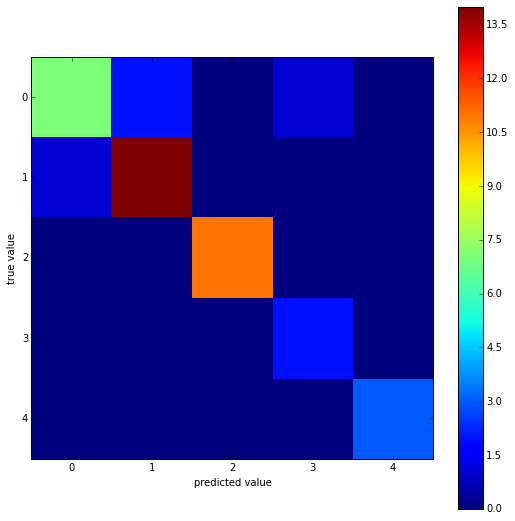

In [242]:
%matplotlib inline
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9,9)    
    
print "classification accuracy:", metrics.accuracy_score(yhat_logreg, y_test)
plot_confusion_matrix(yhat_logreg, np.array(y_test)) 
print "Classification Report:"
print metrics.classification_report(yhat_logreg,np.array(y_test))

In [247]:
resultats = pd.DataFrame()
resultats['y_test'] = y_test 
resultats['y_hat_onevsall'] = yhat_onevsrest
resultats['y_hat_log'] = yhat_logreg
resultats.to_csv('resultats_classificacio1_28022916.csv')

### 3. Results

The results can be summarized in the following statements: 

- If we compare the LinearSVC and the LogisticRegression, we can see that the accuracy is slightly better for the LinearSVC model (with an accuracy of 0.92 on test, over the 0.90 from the LogisticRegression). 
- Both model show good results across all topics, being the topic 0 the one with lower performance. 